# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-xXZmSbTDYrghHNRkOBj-Es&si=iQeuCDt8Z_D3uzoq >}}

# 2. Imports 

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# 3. 데이터준비 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv")
df_feature = df.assign(
    log_trip_duration = np.log(df.trip_duration),
    pickup_datetime = df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = df.dropoff_datetime.apply(pd.to_datetime),
    dist = np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek
)

# 4. 시각화3 -- 애니메이션 

## A. scatter / (vendor_id,hour)

`-` 시각화 

- B가 전체적으로 동그라미가 큰것같지 않어..? 
- 시간대별로 확실히 빈도가 다르다

`-` 추가시각화1 -- `vendor_id`별 `passenger_count`를 barplot으로 시각화 

`-` 추가시각화2 -- `vendor_id`별 `passenger_count`를 boxplot으로 시각화 

`-` 추가시각화3 -- `vendor_id`별 `passenger_count`를 histogram으로 시각화 

`-` 추가시각화4 -- `pickup_hour`별 `count`를 barplot으로 시각화 

`-` 추가시각화5 -- (`pickup_hour`,`vendor_id`)별 `count`를 barplot으로 시각화 

`-` 추가시각화6 -- (`pickup_hour`,`vendor_id`)별 `count`를 areaplot으로 시각화 

`-` 추가시각화7 -- (`pickup_hour`,`vendor_id`)별 `count`를 lineplot으로 시각화 

## B. scatter / (vendor_id,day_of_week)

# 5. 시각화4 -- `heatmap`

## A. (요일,시간)에 따른 `count` 시각화 

## B. (요일,시간)에 따른 `dist` 시각화

## C. (요일,시간)에 따른 `speed` 시각화

# 6. 시각화5 -- 경로시각화 

`-` 이거는 너무 무거워서 좀 작은 데이터로 실습합니다. 

In [17]:
df_feature_small = df_feature[::100].reset_index(drop=True)

## A. 예비학습 

`-` 경로그리기 

In [4]:
df_sample = pd.DataFrame(
    {'path':['A','A','B','B','B'],
     'lon':[-73.986420,-73.995300,-73.975922,-73.988922,-73.962654],
     'lat':[40.756569,40.740059,40.754192,40.762859,40.772449]}
)

`-` 산점도로 그리기 

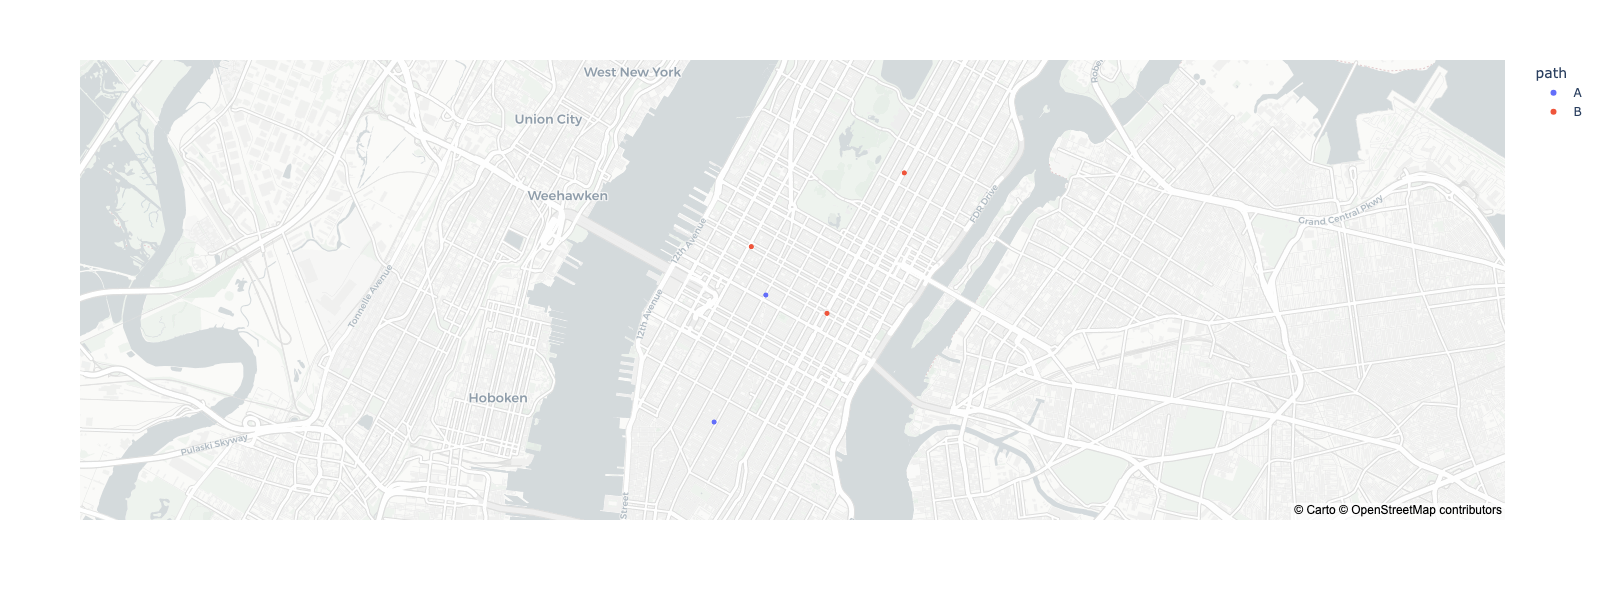

In [ ]:
_fig = px.scatter_mapbox(
    data_frame=df_sample,
    lat="lat", 
    lon="lon", 
    color='path',
    #---#
    mapbox_style='carto-positron',
    zoom=12,
    width=750,
    height=600,
)
_fig.show(config={'scrollZoom': False})

`-` 합치기 

In [ ]:
_fig.data

(Scattermapbox({
     'hovertemplate': 'path=A<br>lat=%{lat}<br>lon=%{lon}<extra></extra>',
     'lat': array([40.756569, 40.740059]),
     'legendgroup': 'A',
     'lon': array([-73.98642, -73.9953 ]),
     'marker': {'color': '#636efa'},
     'mode': 'markers',
     'name': 'A',
     'showlegend': True,
     'subplot': 'mapbox'
 }),
 Scattermapbox({
     'hovertemplate': 'path=B<br>lat=%{lat}<br>lon=%{lon}<extra></extra>',
     'lat': array([40.754192, 40.762859, 40.772449]),
     'legendgroup': 'B',
     'lon': array([-73.975922, -73.988922, -73.962654]),
     'marker': {'color': '#EF553B'},
     'mode': 'markers',
     'name': 'B',
     'showlegend': True,
     'subplot': 'mapbox'
 }))

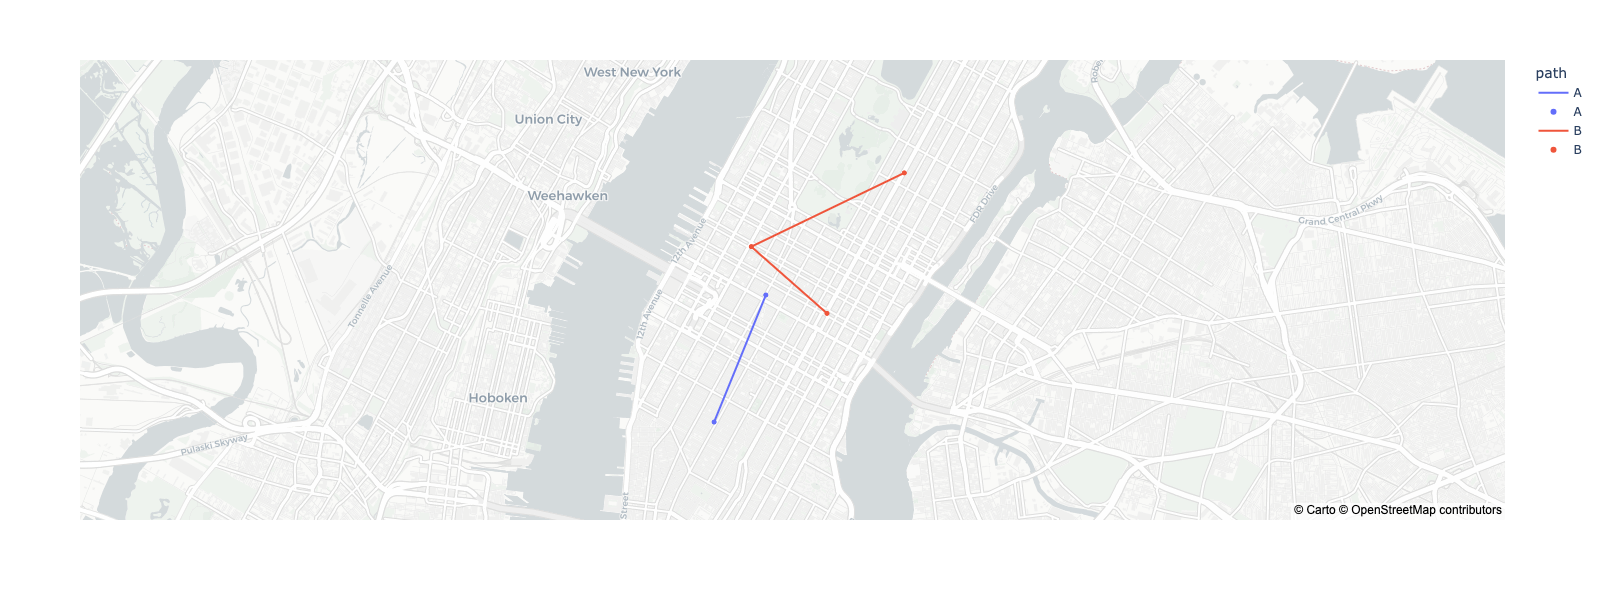

In [ ]:
fig = px.line_mapbox(
    data_frame=df_sample,
    lat="lat", 
    lon="lon", 
    line_group = 'path',
    color='path',
    #---#
    mapbox_style='carto-positron',
    zoom=12,
    width=750,
    height=600,
)
fig.add_trace(_fig.data[0])
fig.add_trace(_fig.data[1])
fig.show(config={'scrollZoom': False})

## B. 전처리

In [5]:
pcols = ['pickup_datetime','pickup_longitude','pickup_latitude']
dcols = ['dropoff_datetime','dropoff_longitude','dropoff_latitude']

In [19]:
def transform(df):
    pick_up = df.loc[:,['id']+pcols].set_axis(['id','datetime','lon','lat'],axis=1).eval('state = "pickup"')
    drop_off = df.loc[:,['id']+dcols].set_axis(['id','datetime','lon','lat'],axis=1).eval('state = "dropoff"')
    return pd.concat([pick_up,drop_off],axis=0).reset_index(drop=True)

In [20]:
df_left = pd.concat([transform(df) for i,df in df_feature_small.groupby('id')]).reset_index(drop=True)
df_right = df_feature_small.drop(pcols+dcols,axis=1)
df_feature_small2 = pd.merge(df_left,df_right)

In [21]:
df_feature_small2

,id,datetime,lon,lat,state,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,log_trip_duration,dist,speed,pickup_hour,dropoff_hour,dayofweek
0,id0037819,2016-05-16 17:42:32,-73.986420,40.756569,pickup,B,6,N,273,5.609472,0.018747,0.000069,17,17,0
1,id0037819,2016-05-16 17:47:05,-73.995300,40.740059,dropoff,B,6,N,273,5.609472,0.018747,0.000069,17,17,0
2,id0049607,2016-03-13 18:48:49,-73.975922,40.754192,pickup,A,2,N,439,6.084499,0.015625,0.000036,18,18,6
3,id0049607,2016-03-13 18:56:08,-73.988922,40.762859,dropoff,A,2,N,439,6.084499,0.015625,0.000036,18,18,6
4,id0051866,2016-01-04 18:48:12,-73.962654,40.772449,pickup,A,1,N,638,6.458338,0.022953,0.000036,18,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,id3825370,2016-05-08 17:36:48,-73.979195,40.669765,dropoff,A,4,N,2358,7.765569,0.084519,0.000036,16,17,6
288,id3888107,2016-06-21 18:30:05,-73.969429,40.757469,pickup,B,1,N,878,6.777647,0.019685,0.000022,18,18,1
289,id3888107,2016-06-21 18:44:43,-73.982742,40.771969,dropoff,B,1,N,878,6.777647,0.019685,0.000022,18,18,1
290,id3988208,2016-03-01 21:40:13,-73.948929,40.797405,pickup,A,1,N,433,6.070738,0.020110,0.000046,21,21,1


## C. `vendor_id` 별 시각화 

In [ ]:
fig = px.line_mapbox(
    data_frame=df_feature_small2,
    lat="lat", 
    lon="lon", 
    center = {'lat':40.7322, 'lon':-73.9052},
    line_group = 'id',
    color='vendor_id',
    #---#
    mapbox_style='carto-positron',
    zoom=10,
    width=750,
    height=600,
)
trace_data = px.scatter_mapbox(
        data_frame=df_feature_small2,
        lat = 'lat',
        lon = 'lon',
        center = {'lat':40.7322, 'lon':-73.9052},
        color = 'vendor_id',
        size = 'trip_duration',
        size_max = 10,
).data
for d in trace_data: 
    fig.add_trace(d)
fig.update_traces(
    line={
        'width':1,
    },
    opacity=0.8
)
fig.show(config={'scrollZoom': False})

## D. `dayofweek`별 시각화 

In [ ]:
tidydata = df_feature_small2.assign(dayofweek=lambda df: df.dayofweek.astype(str)).sort_values('dayofweek')

fig = px.line_mapbox(
    data_frame=tidydata,
    lat="lat", 
    lon="lon", 
    center = {'lat':40.7322, 'lon':-73.9052},
    line_group = 'id',
    color='dayofweek',
    #---#
    mapbox_style='carto-positron',
    zoom=10,
    width=750,
    height=600,
)
trace_data = px.scatter_mapbox(
        data_frame=tidydata,
        lat = 'lat',
        lon = 'lon',
        center = {'lat':40.7322, 'lon':-73.9052},
        color = 'dayofweek',
        size = 'trip_duration',
        size_max = 10,
).data
for d in trace_data: 
    fig.add_trace(d)
fig.update_traces(
    line={
        'width':1,
    },
    opacity=0.8
)
fig.show(config={'scrollZoom': False})

## E. `speed`별 시각화 

In [ ]:
df_feature_small2.assign(
    speed_cut = lambda df: pd.qcut(df.speed,4)
)

,id,datetime,lon,lat,state,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,log_trip_duration,dist,speed,pickup_hour,dropoff_hour,dayofweek,speed_cut
0,id0037819,2016-05-16 17:42:32,-73.986420,40.756569,pickup,B,6,N,273,5.609472,0.018747,0.000069,17,17,0,"(4.78e-05, 0.000109]"
1,id0037819,2016-05-16 17:47:05,-73.995300,40.740059,dropoff,B,6,N,273,5.609472,0.018747,0.000069,17,17,0,"(4.78e-05, 0.000109]"
2,id0049607,2016-03-13 18:48:49,-73.975922,40.754192,pickup,A,2,N,439,6.084499,0.015625,0.000036,18,18,6,"(2.63e-05, 3.63e-05]"
3,id0049607,2016-03-13 18:56:08,-73.988922,40.762859,dropoff,A,2,N,439,6.084499,0.015625,0.000036,18,18,6,"(2.63e-05, 3.63e-05]"
4,id0051866,2016-01-04 18:48:12,-73.962654,40.772449,pickup,A,1,N,638,6.458338,0.022953,0.000036,18,18,0,"(2.63e-05, 3.63e-05]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,id3825370,2016-05-08 17:36:48,-73.979195,40.669765,dropoff,A,4,N,2358,7.765569,0.084519,0.000036,16,17,6,"(2.63e-05, 3.63e-05]"
288,id3888107,2016-06-21 18:30:05,-73.969429,40.757469,pickup,B,1,N,878,6.777647,0.019685,0.000022,18,18,1,"(-0.001, 2.63e-05]"
289,id3888107,2016-06-21 18:44:43,-73.982742,40.771969,dropoff,B,1,N,878,6.777647,0.019685,0.000022,18,18,1,"(-0.001, 2.63e-05]"
290,id3988208,2016-03-01 21:40:13,-73.948929,40.797405,pickup,A,1,N,433,6.070738,0.020110,0.000046,21,21,1,"(3.63e-05, 4.78e-05]"


In [ ]:
tidydata = df_feature_small2.assign(
    speed_cut = lambda df: pd.qcut(df.speed,4)
).sort_values('speed_cut')
fig = px.line_mapbox(
    data_frame=tidydata,
    lat="lat", 
    lon="lon", 
    center = {'lat':40.7322, 'lon':-73.9052},
    line_group = 'id',
    color='speed_cut',
    #---#
    mapbox_style='carto-positron',
    zoom=10,
    width=750,
    height=600,
)
trace_data = px.scatter_mapbox(
        data_frame=tidydata,
        lat = 'lat',
        lon = 'lon',
        center = {'lat':40.7322, 'lon':-73.9052},
        color = 'speed_cut',
        size = 'trip_duration',
        size_max = 10,
).data
for d in trace_data: 
    fig.add_trace(d)
fig.update_traces(
    line={
        'width':1,
    },
    opacity=0.8
)
fig.show(config={'scrollZoom': False})

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

